In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.svm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,r2_score

In [2]:
dia=pd.read_csv(r"C:\Users\emonn\Downloads\ML Trannings\datasets\diabetes.csv")

In [3]:
dia.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [4]:
dia.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
dia.shape[0],dia.shape[1]


(768, 9)

In [13]:
minAge=min(dia.Age)
maxAge=max(dia.Age)
meanAge=dia.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 21
Max Age : 81
Mean Age : 33.240885416666664


In [14]:
young_Ages=dia[(dia.Age>=21)&(dia.Age>40)]
middle_Ages=dia[(dia.Age>=40)&(dia.Age>59)]
elderly_Ages=dia[(dia.Age>59)]
print("Young Ages :",len(young_Ages))
print("Middle Ages :",len(middle_Ages))
print("Elderly Ages :",len(elderly_Ages))

Young Ages : 194
Middle Ages : 32
Elderly Ages : 32


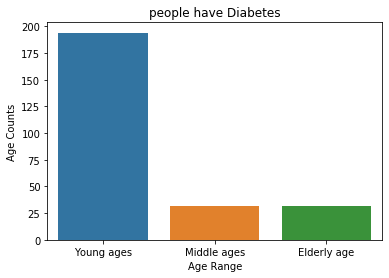

In [16]:
sns.barplot(x=['Young ages','Middle ages','Elderly age'],y=[len(young_Ages),len(middle_Ages),len(elderly_Ages)])
plt.xlabel('Age Range')
plt.ylabel("Age Counts")
plt.title("people have Diabetes")
plt.show()

No handles with labels found to put in legend.


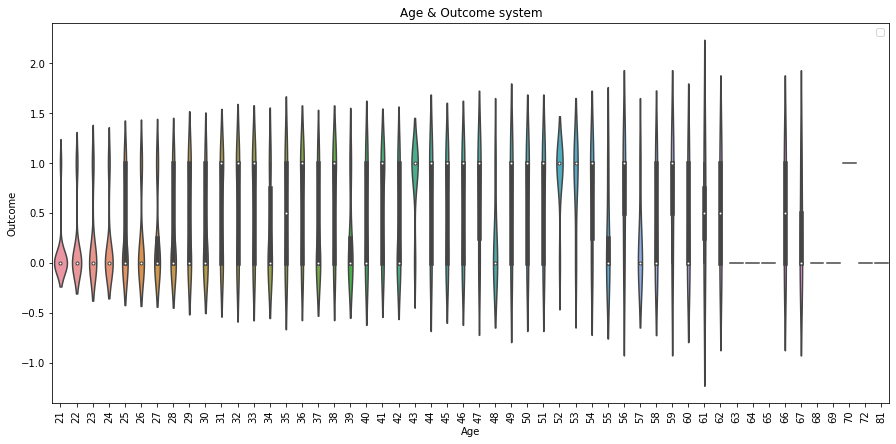

In [19]:
plt.figure(figsize=(15,7))
sns.violinplot(x=dia.Age,y=dia.Outcome)
plt.xticks(rotation=90)
plt.legend()
plt.title('Age & Outcome system')
plt.show()

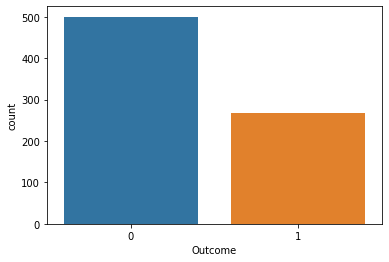

In [20]:
sns.countplot(x="Outcome",data=dia)
plt.show()

In [23]:
NoDisease=len(dia[dia.Outcome==0])
HaveDisease=len(dia[dia.Outcome==1])
print("Patients Have No Diabetes :{:2f}%".format((NoDisease/(len(dia.Outcome))*100)))
print("Patients Have Diabetes:{:2f}%".format((HaveDisease/(len(dia.Outcome))*100)))

Patients Have No Diabetes :65.104167%
Patients Have Diabetes:34.895833%


In [24]:
dia.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [26]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


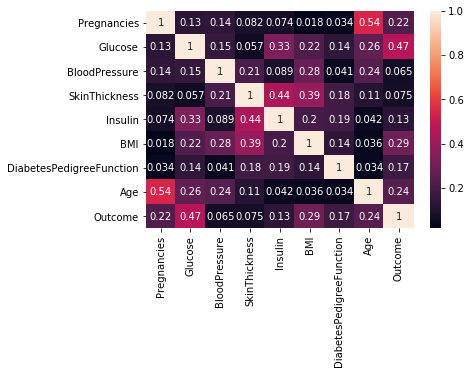

In [27]:
sns.heatmap(dia.corr().abs(),annot=True)
plt.show()

In [28]:
dia.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [29]:
dia.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [56]:
X=dia.iloc[:,1:7]

In [57]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,148,72,35,0,33.6,0.627
1,85,66,29,0,26.6,0.351
2,183,64,0,0,23.3,0.672
3,89,66,23,94,28.1,0.167
4,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171
764,122,70,27,0,36.8,0.340
765,121,72,23,112,26.2,0.245
766,126,60,0,0,30.1,0.349


In [58]:
Y=dia.iloc[:,-1:]

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=1)

In [60]:
#LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train)
print("Test Accuracy :{:.2f}%".format(LR.score(X_test,Y_test)*100))

Test Accuracy :77.49%


E:\Game-Apps\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
#LinearRegrassion
lr=LinearRegression()
lr.fit(X_train,Y_train)
print("Test Accuracy :{:.2f}%".format(lr.score(X_test,Y_test)*100))

Test Accuracy :29.97%


In [65]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
Y_pred=knn.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

E:\Game-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7012987012987013


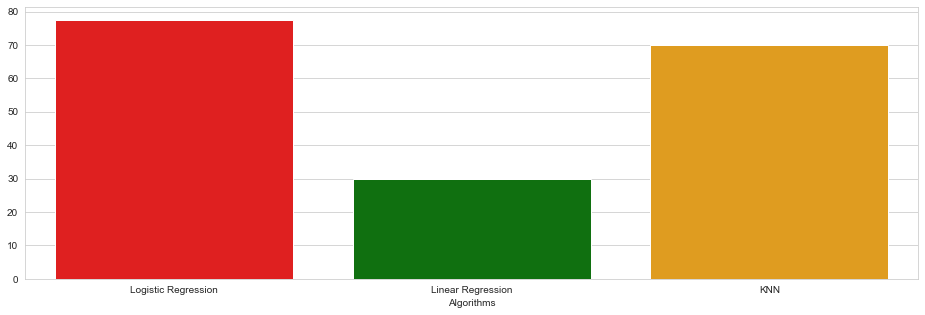

In [66]:
methods = ["Logistic Regression","Linear Regression","KNN"]
Accuracy = [77.49,29.97,70.12]
color=["red","green","orange"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.xlabel("Accuracy %")
plt.xlabel('Algorithms')
sns.barplot(x=methods, y=Accuracy, palette=color)
plt.show()